<a href="https://colab.research.google.com/github/noyon57/Newcolab-file/blob/main/uitsJOurnal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Relevant Libraries Import 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
#Dataset Import
df = pd.read_csv("/content/parkinsons.csv") 

In [ ]:
#data preprocessing Start

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

Replace Simillar Values to Unique Values 

information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map

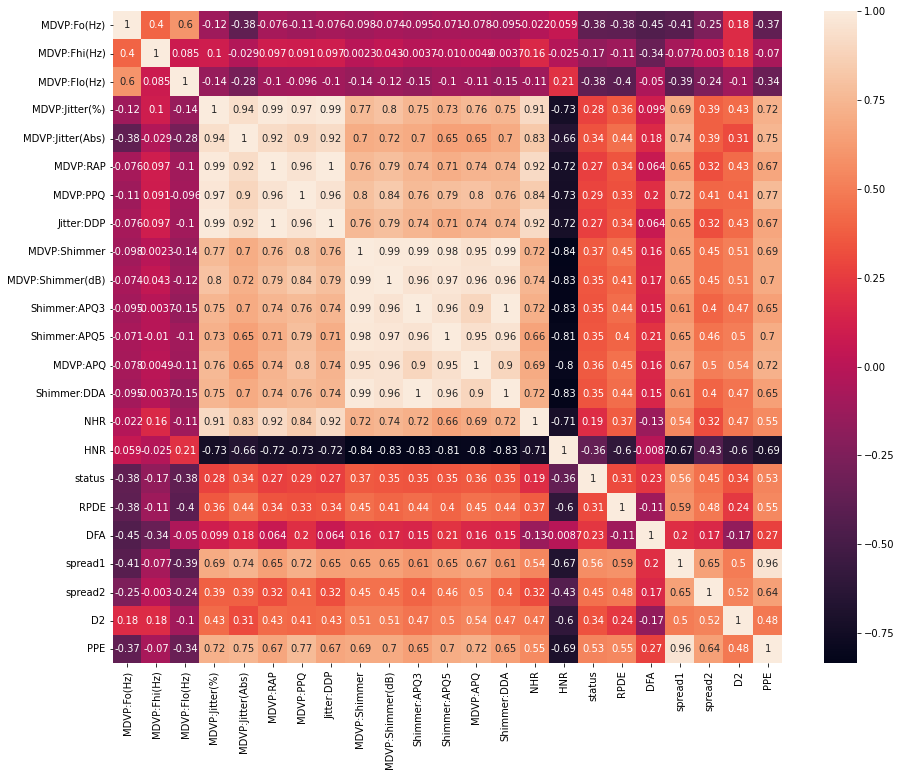

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = df.corr(method='pearson')

correlation_matrix 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# **Label Encoder**

In [ ]:
df.name= le.fit_transform(df.name.values)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    int64  
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Removing duplicated data points
 if find any



In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 0 duplicates data


finding is null value avilable 

In [ ]:
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Creating a test set**

In [ ]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [ ]:
df1=df

In [ ]:
df1.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
from sklearn.preprocessing import StandardScaler

stan_scaler = StandardScaler()

temp2_df = df1
df_scaledstd = pd.DataFrame(stan_scaler.fit_transform(temp2_df),columns = df.columns)
# transform all attributes
#temp2_df[column_names] = stan_scaler.fit_transform(temp2_df[column_names])
#temp2_df.sort_index(inplace=True)
#temp2_df.head()


In [ ]:
df_scaledstd.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-1.723191,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-1.705426,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-1.687661,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-1.669897,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-1.652132,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


**Rescaling or standardizing attributes**

In [ ]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 13.6 MB/s 
     |████████████████████████████████| 96 kB 5.5 MB/s 
     |████████████████████████████████| 2.0 MB 70.5 MB/s 
     |████████████████████████████████| 72 kB 456 kB/s 
     |████████████████████████████████| 3.2 MB 64.6 MB/s 
     |████████████████████████████████| 26.7 MB 1.4 MB/s 
     |████████████████████████████████| 193.6 MB 70 kB/s 
     |████████████████████████████████| 1.6 MB 64.5 MB/s 
     |████████████████████████████████| 121 kB 60.9 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgb

In [ ]:
from featurewiz import featurewiz


Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (195, 24)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
###############################################

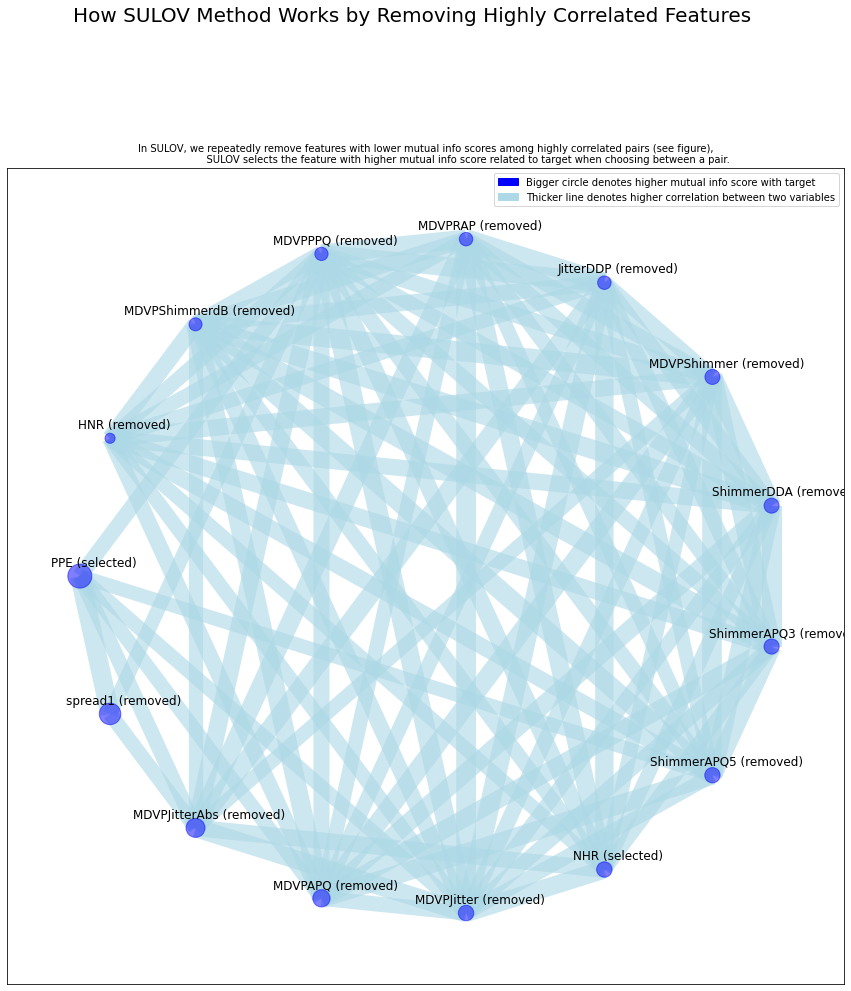

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 9
Final list of selected 9 vars after SULOV = ['D2', 'DFA', 'MDVPFhiHz', 'MDVPFloHz', 'MDVPFoHz', 'RPDE', 'spread2', 'PPE', 'NHR']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 9 
    Taking top 5 features per iteration...
    XGBoost version using 0.90 as tree method: gpu_hist
Number of booster rounds = 100
        using 9 variables...
Regular XGBoost is crashing due to: [05:48:18] /workspace/src/tree/updater_gpu_hist.cu:1407: Exception in gpu_hist: NCCL failure :unhandled cuda error /workspace/src/tree/../common/device_h

In [ ]:
target = 'status'
 
features= featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
print(features)


(['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2', 'PPE', 'NHR'],            D2       DFA  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Fo(Hz)      RPDE  \
0    2.301442  0.815285       157.302        74.997      119.992  0.414783   
1    2.486855  0.819521       148.650       113.819      122.400  0.458359   
2    2.342259  0.825288       131.111       111.555      116.682  0.429895   
3    2.405554  0.819235       137.871       111.366      116.676  0.434969   
4    2.332180  0.823484       141.781       110.655      116.014  0.417356   
..        ...       ...           ...           ...          ...       ...   
190  2.657476  0.657899       230.978        94.261      174.188  0.448439   
191  2.784312  0.683244       253.017        89.488      209.516  0.431674   
192  2.679772  0.655683       240.005        74.287      174.688  0.407567   
193  2.138608  0.643956       396.961        74.904      198.764  0.451221   
194  2.555477  0.664357       260.277        7

In [ ]:
featuresinit=['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', ' Shimmer:APQ5','MDVP:APQ ',
              'Shimmer:DDA',' NHR','HNR',' status','RPDE','DFA','spread1','spread2','D2','PPE']

In [ ]:
featuresnewfromfeaturewiz=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR']


In [ ]:
#After Domain Expert Opinion, FeatureWIZ, FilterBased (Chi-Squared) and WrapperBased  Method = Selected Features. 
featuresfinal=['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2','PPE','NHR']

In [ ]:
features_for_lime=featuresfinal

In [ ]:
#df.head(5)
df_scaledstd.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-1.723191,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-1.705426,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-1.687661,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-1.669897,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-1.652132,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [ ]:
df_scaledstd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    float64
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#df_new=df_scaledstd.drop('ID', axis=1)
df_new=df_scaledstd.drop(columns=['HNR', 'Jitter:DDP', 'MDVP:APQ','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:PPQ','MDVP:RAP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','spread1'])


In [ ]:
df_new.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),NHR,status,RPDE,DFA,spread2,D2,PPE
0,-1.723191,-0.829300,-0.436165,-0.952037,-0.067893,0.571429,-0.807838,1.760814,0.480477,-0.210531,0.868886
1,-1.705426,-0.770972,-0.530974,-0.057721,-0.137843,0.571429,-0.387524,1.837562,1.311185,0.275077,1.803605
2,-1.687661,-0.909476,-0.723168,-0.109875,-0.291633,0.571429,-0.662075,1.942048,1.017682,-0.103629,1.402661
3,-1.669897,-0.909622,-0.649092,-0.114229,-0.280719,0.571429,-0.613134,1.832380,1.293840,0.062145,1.806954
4,-1.652132,-0.925657,-0.606245,-0.130608,-0.178026,0.571429,-0.783021,1.909364,0.096195,-0.130026,2.267082


In [ ]:
dfnew=df_new
#dfnew.info()
df['status'].unique()

array([1, 0])

In [ ]:
X = dfnew.drop( 'status', axis=1)
y = df['status']


In [ ]:
X.shape



(195, 10)

In [ ]:
y.shape

(195,)

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 100, stratify = y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (156, 10)
Number transactions y_train dataset:  (156,)
Number transactions X_test dataset:  (39, 10)
Number transactions y_test dataset:  (39,)


In [ ]:

# logistic regression object
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mse= 0.1282051282051282
msle= 0.06159654024592326
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
# support vector machine object
svm = SVC(kernel='linear')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
# support vector machine object rbf
svm = SVC(kernel='rbf')
  
# train the model on train set
svm.fit(X_train, y_train.ravel())
  
predictions = svm.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

mse= 0.02564102564102564
msle= 0.01231930804918465
mae= 0.02564102564102564
rmse= 0.16012815380508713


In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()
  
# train the model on train set
KNN.fit(X_train, y_train.ravel())
  
predictions = KNN.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

mse= 0.10256410256410256
msle= 0.0492772321967386
mae= 0.10256410256410256
rmse= 0.32025630761017426


In [ ]:
# GNB classifier machine object
GNB =  GaussianNB()
  
# train the model on train set
GNB.fit(X_train, y_train.ravel())
  
predictions = GNB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       0.88      0.76      0.81        29

    accuracy                           0.74        39
   macro avg       0.69      0.73      0.70        39
weighted avg       0.78      0.74      0.76        39

mse= 0.2564102564102564
msle= 0.12319308049184652
mae= 0.2564102564102564
rmse= 0.5063696835418333


In [ ]:
# XGB classifier machine object
XGB = XGBClassifier()
  
# train the model on train set
XGB.fit(X_train, y_train.ravel())
  
predictions = XGB.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        29

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

mse= 0.0
msle= 0.0
mae= 0.0
rmse= 0.0


In [ ]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())
  
predictions = MLP.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())
  
predictions = adaboost.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        29

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

mse= 0.0
msle= 0.0
mae= 0.0
rmse= 0.0


In [ ]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF.fit(X_train, y_train.ravel())
  
predictions = RF.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y.shape))





Before OverSampling, counts of label '1': 118
Before OverSampling, counts of label '0': 38 

Before OverSampling, the shape of train_X: (195, 10)
Before OverSampling, the shape of train_y: (195,) 



In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm_over = SMOTE(random_state = 2)

X_train_res, y_train_res = sm_over.fit_resample(X_train, y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (236, 10)
After OverSampling, the shape of train_y: (236,) 

After OverSampling, counts of label '1': 118
After OverSampling, counts of label '0': 118


In [ ]:

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

mse= 0.1282051282051282
msle= 0.061596540245923245
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_res, y_train_res.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

mse= 0.02564102564102564
msle= 0.01231930804918465
mae= 0.02564102564102564
rmse= 0.16012815380508713


In [ ]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# support vector machine object
svm2 = SVC(kernel='rbf')
  
# train the model on train set
svm2.fit(X_train_res, y_train_res.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_res, y_train_res.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.79      0.88        29

    accuracy                           0.85        39
   macro avg       0.81      0.90      0.83        39
weighted avg       0.90      0.85      0.86        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_res, y_train_res.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39

mse= 0.23076923076923078
msle= 0.11087377244266186
mae= 0.23076923076923078
rmse= 0.4803844614152614


In [ ]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_res, y_train_res.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        29

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

mse= 0.0
msle= 0.0
mae= 0.0
rmse= 0.0


In [ ]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_res, y_train_res.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.90      0.95        29

    accuracy                           0.92        39
   macro avg       0.88      0.95      0.91        39
weighted avg       0.94      0.92      0.93        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_res, y_train_res.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39

mse= 0.05128205128205128
msle= 0.0246386160983693
mae= 0.05128205128205128
rmse= 0.22645540682891915


In [ ]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_res, y_train_res.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39

mse= 0.1282051282051282
msle= 0.06159654024592326
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [ ]:
#NEAR MISS RESULT 
print('After UnderSampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_miss.shape))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After UnderSampling, the shape of train_X: (76, 10)
After UnderSampling, the shape of train_y: (76,) 

After UnderSampling, counts of label '1': 38
After UnderSampling, counts of label '0': 38


In [ ]:

lr1 = LogisticRegression()
lr1.fit(X_train_miss, y_train_miss.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
#decision tree after 
DT1 = DecisionTreeClassifier()
DT1.fit(X_train_miss, y_train_miss.ravel())
predictions = DT1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.93      0.86      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.86      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# support vector machine object
svm1 = SVC(kernel='linear')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

mse= 0.1282051282051282
msle= 0.061596540245923245
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
# support vector machine object
svm1 = SVC(kernel='rbf')
  
# train the model on train set
svm1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = svm1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.0739158482951079
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# KNN classifier machine object
KNN1 =  KNeighborsClassifier()
  
# train the model on train set
KNN1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = KNN1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39

mse= 0.20512820512820512
msle= 0.0985544643934772
mae= 0.20512820512820512
rmse= 0.4529108136578383


In [ ]:
# GNB classifier machine object
GNB1 =  GaussianNB()
  
# train the model on train set
GNB1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = GNB1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39

mse= 0.15384615384615385
msle= 0.07391584829510792
mae= 0.15384615384615385
rmse= 0.3922322702763681


In [ ]:
# XGB classifier machine object
XGB1 =XGBClassifier()
XGB1.fit(X_train_miss, y_train_miss.ravel())
predictions = XGB1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

mse= 0.02564102564102564
msle= 0.01231930804918465
mae= 0.02564102564102564
rmse= 0.16012815380508713


In [ ]:
# MLP classifier machine object
MLP1 = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = MLP1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

mse= 0.1282051282051282
msle= 0.061596540245923245
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
# adaboost classifier machine object
adaboost1 =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = adaboost1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.83      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.91      0.85        39
weighted avg       0.91      0.87      0.88        39

mse= 0.1282051282051282
msle= 0.061596540245923245
mae= 0.1282051282051282
rmse= 0.35805743701971643


In [ ]:
# random Forest classifier machine object
RF1 =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF1.fit(X_train_miss, y_train_miss.ravel())
  
predictions = RF1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

mse= 0.07692307692307693
msle= 0.03695792414755395
mae= 0.07692307692307693
rmse= 0.2773500981126146


In [ ]:
print(features_for_lime)


['D2', 'DFA', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'RPDE', 'spread2', 'PPE', 'NHR']


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 30.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b8fd39653fa5e2bcfabddb978a1ed33fda6ca20dda3b06ee5bfa6957759ff3f5
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=features_for_lime,
    class_names=['0', '1'],
    mode='classification'
)

IndexError: ignored

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test[1], 
    predict_fn=XGB1.predict_proba
)

exp.show_in_notebook(show_table=True)

In [ ]:
pip install shap

In [ ]:
import shap


In [ ]:
explainer = shap.TreeExplainer(adaboost)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value



In [ ]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

In [ ]:
pip install explainerdashboard

In [ ]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# Create the explainer object
explainer = ClassifierExplainer(adaboost, X_test, y_test,model_output='logodds')


In [ ]:

ie = InlineExplainer(explainer)

In [ ]:
ie.shap.overview()


In [ ]:
# SHAP interactions
ie.shap.interaction_dependence()




In [ ]:
# Model Stats
ie.classifier.model_stats()

In [ ]:
# SHAP contribution
ie.shap.contributions_graph()

In [ ]:
# SHAP dependence
ie.shap.dependence()

xgboost algorithm used


Hybrid ensamble


ensamble


In [ ]:
kfold = model_selection.KFold(n_splits=10)
result1 = model_selection.cross_val_score(adaboost, X_train, y_train, cv=kfold)
#Printing the accuracies achieved in cross-validation
print('Accuracy of xgb Model = ','%.2f' % result1.mean())